In [1]:
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report

In [15]:
data_file = 'val_pred.tsv'

In [17]:
data = pd.read_csv(data_file, sep='\t')
data.describe()

,Unnamed: 0,tweet_id,class,prediction
count,1522.000000,1.522000e+03,1522.000000,1522.000000
mean,760.500000,9.911210e+17,0.087385,0.087385
std,439.507869,1.483098e+17,0.282491,0.282491
min,0.000000,6.427636e+17,0.000000,0.000000
25%,380.250000,8.949582e+17,0.000000,0.000000
50%,760.500000,1.024890e+18,0.000000,0.000000
75%,1140.750000,1.112412e+18,0.000000,0.000000
max,1521.000000,1.201992e+18,1.000000,1.000000


In [18]:
actual = data['class']
predict = data['prediction']
print(classification_report(actual, predict))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1389
           1       0.96      0.96      0.96       133

    accuracy                           0.99      1522
   macro avg       0.98      0.98      0.98      1522
weighted avg       0.99      0.99      0.99      1522



Predicted     0    1
Actual              
0          1384    5
1             5  128


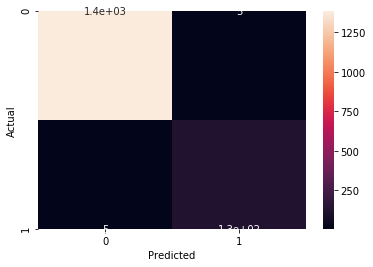

In [19]:
confusion_matrix = pd.crosstab(actual, predict, rownames=['Actual'], colnames=['Predicted'])
print (confusion_matrix)
sn.heatmap(confusion_matrix, annot=True)
plt.show()

In [20]:
data[data['class'] != data['prediction']]

,Unnamed: 0,tweet_id,tweet,class,prediction
29,29,1024736913989795841,5. опыт с велаксином кончился спустя неделю по...,1,0
88,88,1037357275508367361,да не ребят я лучше попью чая черного(как душа...,1,0
132,132,1161717883866685441,когда в апреле мне сменили ад и добавили нормо...,0,1
315,315,955338200049909760,Что не говори А прегаболин сбивает любые отходосы,0,1
451,451,970747890128904195,@wP9LlUePqmJOK6R это же ксанакс? от него вроде...,1,0
939,939,906652851358912512,"Выпила таблетку Ксанакса, сижу бешусь, хочется...",1,0
977,977,893189031898599425,лоперамид и три явы красные,1,0
1119,1119,1131951666243280897,"Где мой метопролол, сердце заебало уже битый ч...",0,1
1244,1244,918774684568772609,Зато к прозаку и нормотимику привыкаю потихонь...,0,1
1307,1307,976160263635423235,"Аналог сибутрамина, который отбивал аппетит. Н...",0,1


In [21]:
false_pos = data[(data['class'] == 0) & (data['prediction'] == 1)]
false_neg = data[(data['class'] == 1) & (data['prediction'] == 0)]

In [22]:
for tweet in false_pos['tweet'].to_list():
    print(tweet, end='\n\n')

когда в апреле мне сменили ад и добавили нормотимик, то дышать стало легче, и голова как-то посветлела, ночные истерики сократились. в июне добавили габапентин и наконец прекратились невропатические боли. я могу ходить, сидеть, спать, лежать и не ощущать адские боли по всему телу

Что не говори А прегаболин сбивает любые отходосы

Где мой метопролол, сердце заебало уже битый час колотиться на овер сотню, хотя я дома лежу пластом  Такая каша в башке от тревоги

Зато к прозаку и нормотимику привыкаю потихоньку, суицидальных мыслей в голове нет. Но вдруг вернуться и это страшно очень.

Аналог сибутрамина, который отбивал аппетит. Но там была куча побочек, до недержания мочи и кала, суицида, инсультов. Мне однажды выписали, даже бесплатно, я пару дней попила и отказалась - дикая головная боль была, а Лорик нормально переносит, у всех по-разному



In [23]:
for tweet in false_neg['tweet'].to_list():
    print(tweet, end='\n\n')

5. опыт с велаксином кончился спустя неделю после того, как, следуя плану, я выпила не половину таблетки, а уже целую. после этого я долбанулась головой о мраморный пол универа, а в скорой мне сказали, чтобы я немедленно прекращала пить их.

да не ребят я лучше попью чая черного(как душа Оскора) и полежу. а то помню разок так тут выпил лоперамид, потом меня так лоперамидрило неделю что срать вообще не мог.

@wP9LlUePqmJOK6R это же ксанакс? от него вроде зависимость может появиться

Выпила таблетку Ксанакса, сижу бешусь, хочется всех уебать в аэропорту

лоперамид и три явы красные



In [11]:
def analyze(filepath, original_class='class', predicted_class='prediction'):
    
    data = pd.read_csv(filepath, sep='\t')
    data.describe()
    
    actual = data[original_class]
    predict = data[predicted_class]
    print(classification_report(actual, predict))
    
    confusion_matrix = pd.crosstab(actual, predict, rownames=['Actual'], colnames=['Predicted'])
    print (confusion_matrix)
    sn.heatmap(confusion_matrix, annot=True)
    plt.show()
    
    false_pos = data[(data['class'] == 0) & (data['prediction'] == 1)]
    false_neg = data[(data['class'] == 1) & (data['prediction'] == 0)]
    
    print(f'data analyzed, returning {len(false_pos)} false_positives and {len(false_neg)} false_negatives')
    return false_pos['tweet'].to_list(), false_neg['tweet'].to_list()

In [12]:
f_p, f_n = analyze('train_pred.tsv')

FileNotFoundError: [Errno 2] File b'train_pred.tsv' does not exist: b'train_pred.tsv'